In [62]:
%pip install pandas openpyxl mglearn
import pandas as pd

# 讀取 Excel 文件中的所有工作表
excel_path = 'output.xlsx'
sheets = pd.read_excel(excel_path, engine='openpyxl')

# 顯示前幾行資料
print(sheets)
df = sheets.copy(deep=True)

Note: you may need to restart the kernel to use updated packages.
        職類名稱                   提名單位  名次  得名次數
0       綜合機械         臺中市立臺中工業高級中等學校   1   2.0
1       綜合機械                    NaN   3   NaN
2       綜合機械         臺中市立大甲工業高級中等學校   4   1.0
3       綜合機械           國立羅東高級工業職業學校   5   2.0
4       綜合機械           國立新竹高級工業職業學校  佳作   1.0
...      ...                    ...  ..   ...
19173  工業4.0      國立成功大學附屬臺南工業高級中等學  缺失   0.0
19174  工業4.0               國立高雄餐旅大學  缺失   0.0
19175  工業4.0           國立華南高級商業職業學校  缺失   0.0
19176  工業4.0           桃園市立羅浮高級中等學校  缺失   0.0
19177  工業4.0  財團法人新北市私立莊敬高級工業家事職業學校  缺失   0.0

[19178 rows x 4 columns]


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df_new = pd.DataFrame(columns=['職類名稱', '提名單位', '得名次數', '名次'])

# 將名次轉換為數值類型，將非數值的名次設為 0
df['名次'] = pd.to_numeric(df['名次'], errors='coerce').fillna(0)

# 將提名單位和職類名稱轉換為數值類型
df['提名單位'] = df['提名單位'].astype('category').cat.codes
df['職類名稱'] = df['職類名稱'].astype('category').cat.codes

# 設置特徵和標籤
X = df[['職類名稱', '提名單位']]
y = (df['得名次數'] > 0).astype(int)  # 將得名次數大於 0 設為 1，否則設為 0

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練隨機森林模型
model = RandomForestClassifier(n_estimators=6, random_state=2, max_depth=5)
model.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = model.predict(X_test)

# 計算準確率
# accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9640250260688217
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3698
           1       0.00      0.00      0.00       138

    accuracy                           0.96      3836
   macro avg       0.48      0.50      0.49      3836
weighted avg       0.93      0.96      0.95      3836



c:\Users\adven\miniconda3\envs\deep-learning-d2l\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adven\miniconda3\envs\deep-learning-d2l\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adven\miniconda3\envs\deep-learning-d2l\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [68]:
X_train = X_train.values
y_train = y_train.values

c:\Users\adven\miniconda3\envs\deep-learning-d2l\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


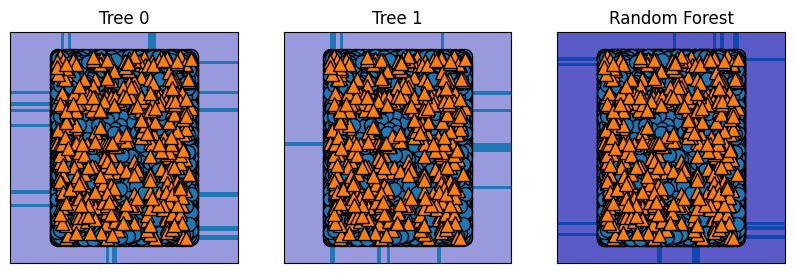

In [70]:

import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes = axes.ravel()

for i, (ax, tree) in enumerate(zip(axes, model.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(model, X_train, fill=True, ax=axes[-1], alpha=.4)

axes[-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [58]:
category = '工業機械修護'
unit = '臺北市立木柵高級工業職業學校'

sheets[(sheets['提名單位'] == unit) & (sheets['得名次數'] != 0.0)].tail(20)

,職類名稱,提名單位,名次,得名次數
229,模具,臺北市立木柵高級工業職業學校,5,3.0
452,集體創作,臺北市立木柵高級工業職業學校,5,3.0
1344,CNC銑床,臺北市立木柵高級工業職業學校,3,4.0
2013,銲接,臺北市立木柵高級工業職業學校,2,1.0
2236,外觀模型創作,臺北市立木柵高級工業職業學校,5,2.0
3128,配管與暖氣,臺北市立木柵高級工業職業學校,1,7.0
3351,電子(工業電子),臺北市立木柵高級工業職業學校,1,1.0
7811,冷凍空調,臺北市立木柵高級工業職業學校,4,6.0
8703,工業機械修護,臺北市立木柵高級工業職業學校,1,9.0
10041,鑄造,臺北市立木柵高級工業職業學校,3,6.0


In [59]:

sheets[(sheets['職類名稱'] == '配管與暖氣') & (sheets['得名次數'] != 0.0)].tail(20)

,職類名稱,提名單位,名次,得名次數
3122,配管與暖氣,臺中市立臺中工業高級中等學校,3,5.0
3123,配管與暖氣,NaN,1,NaN
3128,配管與暖氣,臺北市立木柵高級工業職業學校,1,7.0
3135,配管與暖氣,高雄市立高雄高級工業職業學校,佳作,1.0
3136,配管與暖氣,國立草屯高級商工職業學校,1,5.0
3140,配管與暖氣,國立臺南高級工業職業學校,5,2.0
3151,配管與暖氣,四維學校財團法人花蓮縣四維高級中學,4,4.0
3200,配管與暖氣,高雄市私立大榮高級中學,2,3.0
3201,配管與暖氣,嘉義縣私立萬能高級工商職業學校,4,2.0
3223,配管與暖氣,臺北市立木柵高級工業職業學校,3,1.0


In [60]:

# 預測函數
def predict_award(category, unit):
    # 將輸入轉換為數值類型
    category_code = sheets['職類名稱'].astype('category').cat.categories.get_loc(category)
    unit_code = sheets['提名單位'].astype('category').cat.categories.get_loc(unit)
    
    # 進行預測
    prediction = model.predict([[category_code, unit_code]])

    print(prediction[0])
    
    if prediction[0] == 1:
        return f"提名單位 '{unit}' 在職類 '{category}' 中有可能會得獎"
    else:
        return f"提名單位 '{unit}' 在職類 '{category}' 中不太可能會得獎"

# 測試預測函數


# unit_code = df['提名單位'].astype('category').cat.categories.get_loc(unit)
print(predict_award(category, unit))
# sheets[sheets['職類名稱' == '綜合機械']]

# unit = '不存在的學校'
# print(predict_award(category, unit))

1
提名單位 '臺北市立木柵高級工業職業學校' 在職類 '工業機械修護' 中有可能會得獎


c:\Users\adven\miniconda3\envs\deep-learning-d2l\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [61]:
category = '工業機械修護'
unit = '臺北市立木柵高級工業職業學校'

def predict_award(category, unit):
    category_code = sheets['職類名稱'].astype('category').cat.categories.get_loc(category)
    unit_code = sheets['提名單位'].astype('category').cat.categories.get_loc(unit)

    prediction = model.predict([[category_code, unit_code]])
    
    if prediction[0] == 1:
        return f"提名單位 '{unit}' 在職類 '{category}' 中有可能會得獎"
    else:
        return f"提名單位 '{unit}' 在職類 '{category}' 中不太可能會得獎"


print(predict_award(category, unit))

提名單位 '臺北市立木柵高級工業職業學校' 在職類 '工業機械修護' 中有可能會得獎


c:\Users\adven\miniconda3\envs\deep-learning-d2l\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
